In [1]:
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
import numpy as np

### 확률로 pi(π) 계산하기
N = 1000

Estimated pi = 3.008000


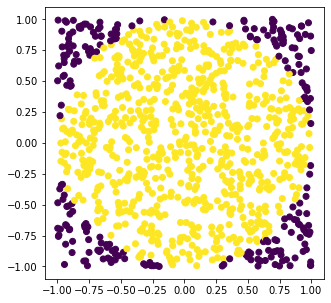

In [5]:
%matplotlib inline
def main():
    plt.figure(figsize=(5,5))
    
    X = []
    Y = []
    
    # N을 10배씩 증가할 때마다 파이 값이 더 정확해진다.
    N = 1000
    
    # 점을 랜덤으로 생성
    for i in range(N):
        # [0, 1] -- ( * 2 ) --> [0, 2] -- ( -1 ) --> [-1, 1]
        X.append(np.random.rand() * 2 -1)
        Y.append(np.random.rand() * 2 -1)
    X = np.array(X)
    Y = np.array(Y)
    
    distance_from_zero = np.sqrt(X*X + Y*Y)
    is_inside_circle = distance_from_zero <= 1
    
    print("Estimated pi = %f" % (np.average(is_inside_circle) * 4))
    a
    plt.scatter(X,Y, c= is_inside_circle)
    plt.savefig('circle.png')
    
    plt.show()
if __name__ == "__main__":
    main()    

### N값 조정 
N = 1000000

Estimated pi = 3.138128


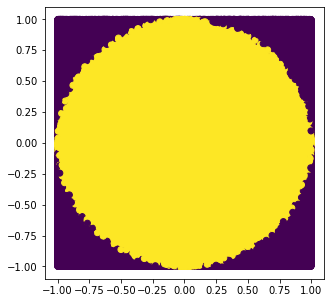

In [7]:
%matplotlib inline
def main():
    plt.figure(figsize=(5,5))
    
    X = []
    Y = []
    
    # N을 10배씩 증가할 때마다 파이 값이 더 정확해진다.
    N = 1000000
    
    # 점을 랜덤으로 생성
    for i in range(N):
        # [0, 1] -- ( * 2 ) --> [0, 2] -- ( -1 ) --> [-1, 1]
        X.append(np.random.rand() * 2 -1)
        Y.append(np.random.rand() * 2 -1)
    X = np.array(X)
    Y = np.array(Y)
    
    distance_from_zero = np.sqrt(X*X + Y*Y)
    is_inside_circle = distance_from_zero <= 1
    
    print("Estimated pi = %f" % (np.average(is_inside_circle) * 4))
    
    plt.scatter(X,Y, c= is_inside_circle)
    plt.savefig('circle.png')
    
    plt.show()
if __name__ == "__main__":
    main()   

### 암 검사 키트 

In [2]:
# A = 1 : 암으로 진단되는 경우
# B = 1 : 실제로 암을 가지고 있는 경우

def main():
    # 민감도
    sensitivity = 0.8
    # 사전 확률
    prior_prob = 0.004
    # 암 X 진단 --> 암 O
    false_alarm = 0.1

    print("확률 p(B = 1|A = 1) : ","%.2lf%%" % (100 * mammogram_test(sensitivity, prior_prob, false_alarm)))

def mammogram_test(sensitivity, prior_prob, false_alarm):
    # 암을 실제로 가지고 있을 때 암으로 진단될 확률 = sensitivity
    p_a1_b1 = sensitivity # p(A = 1 | B = 1)
    
    # 일반적으로 암을 가지고 있을 확률
    p_b1 = prior_prob   # p(B = 1)

    p_b0 = 1 - p_b1    # p(B = 0)
    
    # 실제로 암을 가지고 있지 않지만 암으로 진단되는 확률
    p_a1_b0 = false_alarm # p(A = 1|B = 0)
    
    # P(A = 1∣B = 0)P(B = 0) + P(A = 1∣B = 1)P(B = 1)
    # 실제로 암을 가지고 있지 않지만 암으로 진단될 확률
    # 실제로 암을 가지고 있으면서 암으로 진단될 확률
    p_a1 = p_a1_b0 * p_b0 + p_a1_b1 * p_b1 # p(A = 1) Mammogram 검사를 통해 암으로 진단되는 경우의 확률

    
    # 암 진단을 받았을 때 실제로 암을 가지고 있을 확률
    p_b1_a1 = p_a1_b1 * p_b1 / p_a1 # p(B = 1|A = 1)

    return p_b1_a1

if __name__ == "__main__":
    main()

확률 p(B = 1|A = 1) :  3.11%


### Bag of Words

In [9]:
import re

special_chars_remover = re.compile("[^\w'|_]")

def main():
    sentence = "Bag-of-Words 모델을 Python으로 직접 구현하겠습니다.create_BOW() 함수를 완성하세요. create_BOW()는 문장 한 줄을 입력 받고 해당 문장의 단어 사전과 Bag of Words 모델을 순서대로 리턴합니다."
    # sentence = input()
    bow = create_BOW(sentence)
    
    
    print(bow)


def create_BOW(sentence):
    bow = {}
    sentence_lowered = sentence.lower()
    sentence_without_special_characters = remove_special_characters(sentence_lowered)
    # print(sentence_without_special_characters)
    
    splitted_sentence = sentence_without_special_characters.split()
    splitted_sentence.append('')
    # print(splitted_sentence)
    splitted_sentence_filtered = [
        token 
        for token in splitted_sentence
        if len(token) >= 1
    ]
    # print(splitted_sentence_filtered)
    for token in splitted_sentence_filtered:
        if token not in bow:
            bow[token] = 1
        else:
            bow[token] += 1
    return bow

''' # 더 간단한 방법 ! 

    for token in splitted_sentence_filtered:
        bow.setdefault(token, 0)
        bow[token] += 1
    return bow

    # 과정 합
    sentence = sentence.lower()
    sentence = remove_special_characters(sentence)
    sentence = sentence.split()
    for token in sentence:
        if token in bow:
            bow[token] += 1
        else:
            bow[token] = 1
    return bow

'''




def remove_special_characters(sentence):
    return special_chars_remover.sub(' ', sentence)


if __name__ == "__main__":
    main()

{'bag': 2, 'of': 2, 'words': 2, '모델을': 2, 'python으로': 1, '직접': 1, '구현하겠습니다': 1, 'create_bow': 2, '함수를': 1, '완성하세요': 1, '는': 1, '문장': 1, '한': 1, '줄을': 1, '입력': 1, '받고': 1, '해당': 1, '문장의': 1, '단어': 1, '사전과': 1, '순서대로': 1, '리턴합니다': 1}


### 영화평 감정분석

In [ ]:
import io
import numpy
import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pyplot as plt
import numpy as np
import re
import math

special_chars_remover = re.compile("[^\w'|_]")
def remove_special_characters(sentence):
    return special_chars_remover.sub(' ', sentence)

def main():
    training_sentences = read_data()
    # pos
    testing_sentence = "마음이 따뜻해지는 최고의 영화"
    # neg
    # testing_sentence = "어설픈 연기들로 몰입이 전혀 안되네요"
    prob_pair = naive_bayes(training_sentences, testing_sentence)
    
    plot_title = testing_sentence
    if len(plot_title) > 50: plot_title = plot_title[:50] + "..."
    visualize_boxplot(plot_title,
                  list(prob_pair),
                  ['Negative', 'Positive'])

def naive_bayes(training_sentences, testing_sentence):
    log_prob_negative = calculate_doc_prob(training_sentences[0], testing_sentence, 0.1) + math.log(0.5)
    log_prob_positive = calculate_doc_prob(training_sentences[1], testing_sentence, 0.1) + math.log(0.5)
    prob_pair = normalize_log_prob(log_prob_negative, log_prob_positive)
    
    return prob_pair

def read_data():
    training_sentences = [[], []]
    
    '''
    ## 1
    파일을 읽고 training_sentences에 저장
    '''
    
    with open("./ratings.txt",mode='r') as file:
        next(file)
        for f in file:
            arr = f.split('\t')
            if arr[-1] == '0\n':
                training_sentences[0].append(arr[1])
            elif arr[-1] == '1\n':
                training_sentences[1].append(arr[1])
    
    return [' '.join(training_sentences[0]), ' '.join(training_sentences[1])]

def normalize_log_prob(prob1, prob2):
    
    '''
    ## 4
    로그로 된 확률값을 표준화한다.
    '''
    
    maxprob = max(prob1, prob2)

    prob1 -= maxprob
    prob2 -= maxprob
    prob1 = math.exp(prob1)
    prob2 = math.exp(prob2)
    
    #print(prob1, prob2)

    normalize_constant = 1.0 / float(prob1 + prob2)
    prob1 *= normalize_constant
    prob2 *= normalize_constant

    return (prob1, prob2)

def calculate_doc_prob(training_sentence, testing_sentence, alpha):
    logprob = 0

    training_model = create_BOW(training_sentence)
    testing_model = create_BOW(testing_sentence)

    '''
    ## 3
    training_sentence로 만들어진 모델이,
    testing_sentence를 만들어 낼 **로그 확률** 을 구한다.
    일반 숫자에서 로그값을 만들기 위해서는 math.log() 를 사용한다.
    
    유의할 점 : 일반 숫자에서의 곱셈이 로그에서는 덧셈, 나눗셈은 뺄셈이 된다.
    예) 3 * 5 = 15
        log(3) + log(5) = log(15)
        
        5 / 2 = 2.5
        log(5) - log(2) = log(2.5)
    '''
    
    Sum = sum(training_model.values())
    #print(training_model['영화']/Sum)
    
    
    for i in testing_model:
        #print(i)
        if i in training_model:
            #print(training_model[i]/Sum)
            logprob+=math.log(training_model[i]/Sum)
        else:
            #print(alpha/Sum)
            logprob+=math.log(alpha/Sum)
    #print(logprob)
    return logprob

def create_BOW(sentence):
    bow = {}
    
    '''
    ## 2
    bag of words를 만든다.
    '''
    sentence = sentence.lower()
    
    sentence = remove_special_characters(sentence)
    
    sentence = sentence.split()
    
    for s in sentence:
        if s in bow:
            bow[s] +=1
        else:
            bow[s] = 1

    return bow

# 시각화 
def visualize_boxplot(title, values, labels):
    width = .35

    print(title)
    
    fig, ax = plt.subplots()
    ind = numpy.arange(len(values))
    rects = ax.bar(ind, values, width)
    ax.bar(ind, values, width=width)
    ax.set_xticks(ind + width/2)
    ax.set_xticklabels(labels)

    def autolabel(rects):
        # ach some text labels
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., height + 0.01, '%.2lf%%' % (height * 100), ha='center', va='bottom')

    autolabel(rects)

    plt.savefig("image.svg", format="svg")

if __name__ == "__main__":
    main()